# Set-up

In [38]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
papers = pd.read_excel('..\..\Table_1_Paper_metrics.xlsx')
datasets = pd.read_excel('..\..\Table_3_Dataset_Metrics.xlsx')

In [40]:
# show columns
papers.columns

Index(['Article_ID', 'Title', 'Authors', 'Year', 'N_Datasets',
       'Prelabeled_Dataset', 'Model', 'Model Info', 'Hyperparameter_Trained',
       'Batch_size', 'Metrics', 'OS_Reported', 'OS_availability', 'Data Used',
       'Code_Storage', 'Data_Storage', 'AL_use_description', 'Best_Model',
       'Final_Verdict_AL_System'],
      dtype='object')

# Visualizations

In [41]:
# machine learning model frequency
# Split the metrics and count occurrences
model_counts = {}

for models in papers['Model'].dropna():
    # Split by commas, then strip leading/trailing whitespaces and convert to lowercase
    split_models = [model.strip() for model in models.split(',')]
    
    for model in split_models:
        if model not in model_counts:
            model_counts[model] = 1
        else:
            model_counts[model] += 1

# Convert the metrics_counts dictionary to a Pandas Series for easier manipulation
models_counts_series = pd.Series(model_counts)

# Sort the series by the number of occurrences
models_counts_series.sort_values(ascending=False, inplace=True)

# print
models_counts_series

SVM                                22
Logistic regression                12
Neural network                      5
Random Forest                       4
Not Reported                        3
L2-regularized log-linear model     2
Ensemble                            2
LSTM                                2
label spreading                     2
Naïve Bayes                         2
Logistic Regression                 1
decision tree                       1
dtype: int64

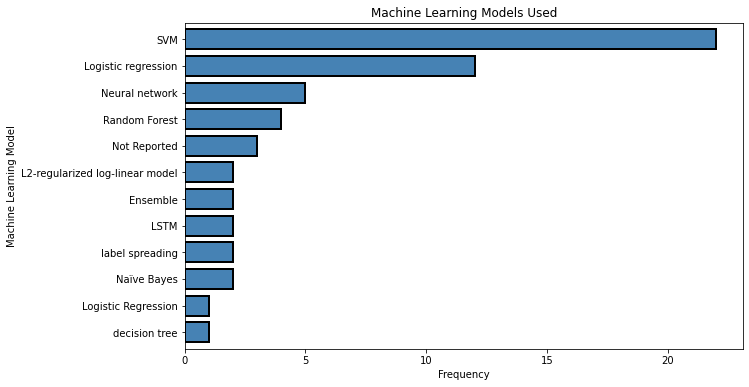

In [50]:
# barplot of machine learning algorithm frequency
plt.figure(figsize=(10, 6))
models_counts_series.plot(kind='barh', edgecolor='black', linewidth=2, color='steelblue', width=0.75)
plt.xlabel('Frequency')
plt.ylabel('Machine Learning Model')
plt.gca().invert_yaxis()
plt.title('Machine Learning Models Used')

# Save figure
plt.savefig('Machine Learning Models Used.png', dpi=300, bbox_inches='tight')

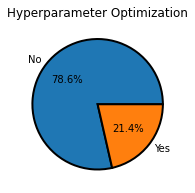

In [53]:
# Hyperparameter optimization
plt.figure(figsize=(3,3))
papers['Hyperparameter_Trained'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.title('Hyperparameter Optimization')
plt.ylabel('')  # Hide the y-axis label

# Save figure
plt.savefig('Hyperparameter Optimization.png', dpi=300, bbox_inches='tight')